# **Import Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Load the Dataset**

In [2]:
import pandas as pd

df = pd.read_csv("spotify_dataset.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41099 entries, 0 to 41098
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41099 non-null  object 
 1   artist            41099 non-null  object 
 2   uri               41099 non-null  object 
 3   danceability      41099 non-null  float64
 4   energy            41099 non-null  float64
 5   key               41099 non-null  int64  
 6   loudness          41099 non-null  float64
 7   mode              41099 non-null  int64  
 8   speechiness       41099 non-null  float64
 9   acousticness      41099 non-null  float64
 10  instrumentalness  41099 non-null  float64
 11  liveness          41099 non-null  float64
 12  valence           41099 non-null  float64
 13  tempo             41099 non-null  float64
 14  duration_ms       41099 non-null  int64  
 15  time_signature    41099 non-null  int64  
 16  chorus_hit        41099 non-null  float6

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,4.109900e+04,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.693375,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,2.348755e+05,3.893647,40.106896,10.475632,0.499964
std,0.177808,0.252629,3.535060,5.311227,0.461098,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,1.189696e+05,0.423072,19.006697,4.872026,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816500,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,1.729165e+05,4.000000,27.599510,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,2.179070e+05,4.000000,35.850270,10.000000,0.000000
75%,0.669000,0.787000,8.000000,-6.375000,1.000000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,2.667730e+05,4.000000,47.627240,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


# **Explore the Dataset**

In [3]:
df.isnull().sum()


,0
track,0
artist,0
uri,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [4]:
df.duplicated().sum()


np.int64(0)

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'chorus_hit'}>,
        <Axes: title={'center': 'sections'}>,
        <Axes: title={'center': 'popularity'}>]], dtype=object)

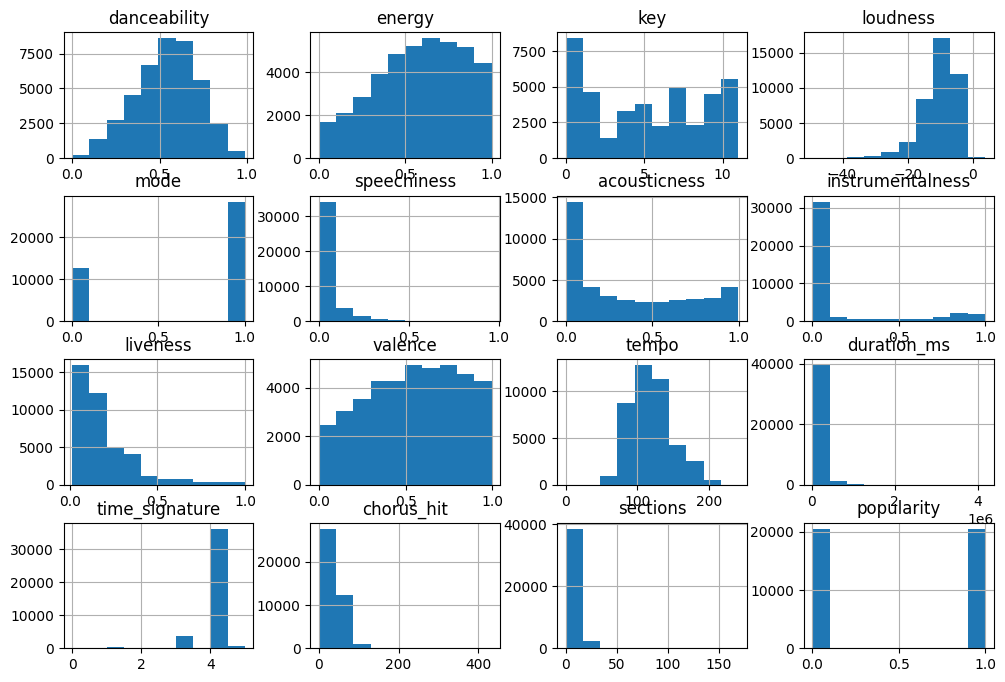

In [5]:
df.hist(figsize=(12,8))


# **Features**

In [6]:
features = ["danceability", "energy", "acousticness", "valence",
            "tempo", "loudness", "instrumentalness", "speechiness", "liveness"]

df_features = df[features]
df_features.head()


,danceability,energy,acousticness,valence,tempo,loudness,instrumentalness,speechiness,liveness
0,0.417,0.620,0.490,0.845,185.655,-7.727,0.000000,0.0403,0.0779
1,0.498,0.505,0.018,0.797,101.801,-12.475,0.107000,0.0337,0.1760
2,0.657,0.649,0.846,0.908,115.940,-13.392,0.000004,0.0380,0.1190
3,0.590,0.545,0.706,0.967,105.592,-12.058,0.024600,0.1040,0.0610
4,0.515,0.765,0.857,0.906,114.617,-3.515,0.000872,0.1240,0.2130


# **Handle Missing Values**

In [7]:
df_features = df_features.dropna()


# **Scale the Data**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


# **Number of Clusters**

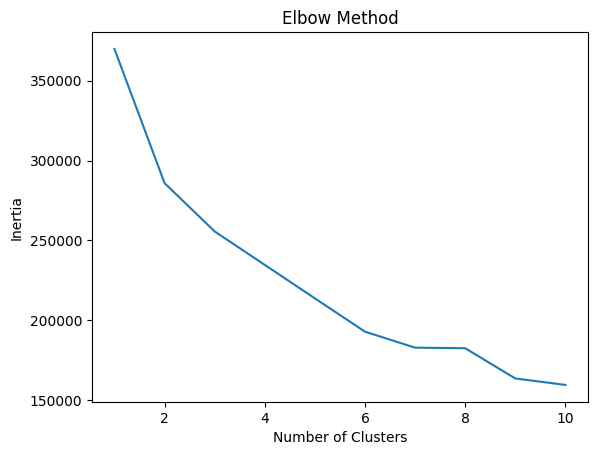

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


# **Train K-Means Model**

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


# **Visualize Clusters**

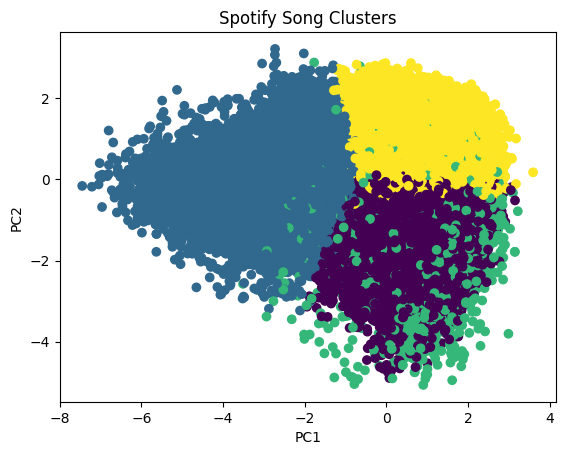

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Spotify Song Clusters")
plt.show()


In [14]:
df.groupby("cluster")[features].mean()


,danceability,energy,acousticness,valence,tempo,loudness,instrumentalness,speechiness,liveness
cluster,,,,,,,,,
0,0.443539,0.759135,0.125930,0.435615,140.126949,-7.139118,0.164640,0.073938,0.184666
1,0.409016,0.254233,0.772767,0.320664,108.061796,-16.273943,0.349801,0.046790,0.158465
2,0.527030,0.661066,0.357806,0.562449,119.274818,-9.353536,0.090095,0.165692,0.624000
3,0.668528,0.639076,0.278070,0.720887,113.644209,-8.839561,0.054191,0.068638,0.152445


In [15]:
df.to_csv("spotify_clustered.csv", index=False)
